In [1]:
import pandas as pd 
import numpy as np
import  matplotlib.pyplot as plt
from main import leitura_csv

Nulos:
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
 duplicados: 0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64
Inconsistencia:
Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []


In [2]:
def evoluçao_close():
    plt.figure(figsize=(12,6))
    plt.plot(df['Date'], df['Close'], label='Preço de Fechamento', color='blue')
    plt.title('Preço de Fechamento da Ação da Google (2015-2024)')
    plt.xlabel('Data')
    plt.ylabel('Preço ($)')
    plt.grid(True)
    plt.legend()
    plt.show()

In [3]:
def media_volume():
    df = leitura_csv()
    df['month'] = df['Date'].dt.month
    df['year'] = df['Date'].dt.year
    media = df.groupby(['year', 'month'])['Volume'].mean()

    plt.figure(figsize=(15, 7)) 
    media.plot(kind='bar', color='skyblue') 
    plt.title('Média Mensal de Volume por Ano')
    plt.xlabel('Ano e Mês')
    plt.ylabel('Volume Médio')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [4]:
def variacao_preço_ano():
    df = leitura_csv()
    df['year'] = df['Date'].dt.year
    variacao = df.groupby('year')['Close'].agg(lambda x: x.max() - x.min())
    print(variacao)
    plt.figure(figsize=(12,6))
    variacao.plot(kind='bar', color='tomato', edgecolor='black')
    plt.title('Variação Anual do Preço de Fechamento das Ações da Google')
    plt.xlabel('Ano')
    plt.ylabel('Variação de Preço ($)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [5]:
def desvio_padrao():
    df = leitura_csv()
    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    desvio_padrao = df.groupby(['year','month'])['Close'].std().unstack()
    print(desvio_padrao)
    plt.figure(figsize=(15, 6))
    plt.imshow(desvio_padrao, aspect='auto', cmap='hot', interpolation='nearest')
    plt.title('Volatilidade Mensal do Preço de Fechamento (Desvio Padrão)')
    plt.xlabel('Mês')
    plt.ylabel('Ano')
    plt.colorbar(label='Desvio Padrão')
    plt.xticks(ticks=range(12), labels=range(1, 13))
    plt.yticks(ticks=range(len(desvio_padrao.index)), labels=desvio_padrao.index)
    plt.show()

In [6]:
def analise_de_tendencias():
    df = leitura_csv()
    df['media_movel'] = df['Close'].rolling(window=30).mean()
    print(df['media_movel'])
    plt.figure(figsize=(15, 6))
    plt.plot(df['Date'], df['Close'], label='Preço de Fechamento', alpha=0.5)
    plt.plot(df['Date'], df['media_movel'], label='Média Móvel (30 dias)', color='red')
    plt.title('Tendência do Preço de Fechamento com Média Móvel (30 dias)')
    plt.xlabel('Data')
    plt.ylabel('Preço ($)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [7]:
def detecta_anomalias(ano_escolhido=2020):
    df = leitura_csv()
    df['year'] = df['Date'].dt.year
    df = df[df['year'] == ano_escolhido]
    df['month'] = df['Date'].dt.month
    df['day'] = df['Date'].dt.day
    medias = df.groupby(['month', 'day'])['Close'].mean()
    desvios = df.groupby(['month', 'day'])['Close'].std()

    df['media_dia'] = df.apply(lambda row: medias.loc[(row['month'], row['day'])], axis=1)
    df['std_dia'] = df.apply(lambda row: desvios.loc[(row['month'], row['day'])], axis=1)

    df['anomalia'] = (df['Close'] > df['media_dia'] + 2 * df['std_dia']) | \
                     (df['Close'] < df['media_dia'] - 2 * df['std_dia'])

    import matplotlib.pyplot as plt
    plt.figure(figsize=(15, 6))
    plt.plot(df['Date'], df['Close'], label='Fechamento')
    plt.scatter(df[df['anomalia']]['Date'], df[df['anomalia']]['Close'],
                color='red', label='Anomalias', zorder=5)
    plt.title(f'Anomalias no Preço de Fechamento em {ano_escolhido}')
    plt.xlabel('Data')
    plt.ylabel('Preço de Fechamento ($)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [8]:
def prev_tendencias():
    df = leitura_csv()
    df['media_curta'] = df['Close'].rolling(window = 20).mean()
    df['media_longa'] = df['Close'].rolling(window = 50).mean()
    df['compra'] = (df['media_curta'] > df['media_longa']) & (df['media_curta'].shift(1) <= df['media_longa'].shift(1))
    df['venda'] = (df['media_curta'] < df['media_longa']) & (df['media_curta'].shift(1) >= df['media_longa'].shift(1))
    
    plt.figure(figsize=(15,6))
    plt.plot(df['Date'], df['Close'], label='Preço Fechamento', color='gray', alpha=0.4)
    plt.plot(df['Date'], df['media_curta'], label='Média Curta (20)', color='blue')
    plt.plot(df['Date'], df['media_longa'], label='Média Longa (50)', color='orange')

    # Sinais
    plt.scatter(df.loc[df['compra'], 'Date'], df.loc[df['compra'], 'Close'], label='Compra', marker='^', color='green', s=100)
    plt.scatter(df.loc[df['venda'], 'Date'], df.loc[df['venda'], 'Close'], label='Venda', marker='v', color='red', s=100)

    plt.title('Análise de Tendência com Médias Móveis')
    plt.xlabel('Data')
    plt.ylabel('Preço ($)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [9]:
def retorno_diario():
    df = leitura_csv()
    df['retorno_diario'] = df['Close'].pct_change()
    plt.figure(figsize=(10, 6))
    plt.hist(df['retorno_diario'].dropna(), bins=50, color='skyblue', edgecolor='black')
    plt.title('Distribuição dos Retornos Diários')
    plt.xlabel('Retorno Diário (%)')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    media = df['retorno_diario'].mean()
    desvio = df['retorno_diario'].std()
    print(f"Media:{media}")
    print(f"Desvio:{desvio}")

In [10]:
def volatilidade_anual():
    df = leitura_csv()
    df['retorno_diario'] = df['Close'].pct_change()
    df['year'] = df['Date'].dt.year
    volatilidade_anual = df.groupby('year')['retorno_diario'].std()*np.sqrt(252) #multiplicando pelo numero medio de pregoes(dias uteis da bolsa) por ano
    plt.figure(figsize=(12, 6))
    volatilidade_anual.plot(kind='bar', color='salmon', edgecolor='black')
    plt.title('Volatilidade Anual das Ações')
    plt.xlabel('Ano')
    plt.ylabel('Volatilidade Anual (Desvio Padrão)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()
    return volatilidade_anual

In [11]:
def sharpe_ratio_anual():
    df = leitura_csv()
    df['retorno_diario'] = df['Close'].pct_change()
    df['year'] = df['Date'].dt.year
    retorno_medio_anual = df.groupby('year')['retorno_diario'].mean()*253
    volatilidade_anual = df.groupby('year')['retorno_diario'].std()*np.sqrt(252)
    sharpe_ratio = retorno_medio_anual/volatilidade_anual
    print(sharpe_ratio)
    plt.figure(figsize=(12, 6))
    sharpe_ratio.plot(kind='bar', color='mediumseagreen', edgecolor='black')
    plt.title('Sharpe Ratio Anual')
    plt.xlabel('Ano')
    plt.ylabel('Sharpe Ratio')
    plt.axhline(y=1, color='red', linestyle='--', label='Referência: 1.0')
    plt.grid(axis='y', linestyle=':', alpha=0.7)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [12]:
def identificar_drawdowns():
    df = leitura_csv()
    df['retorno_diario'] = df['Close'].pct_change()
    df['valor_acumulado'] = (1+df['retorno_diario']).cumprod()
    df['pico'] = df['valor_acumulado'].cummax()
    df['drawdown'] = (df['valor_acumulado'] - df['pico'])/ df['pico']
    print(df['drawdown'])
    plt.figure(figsize=(12, 6))
    plt.plot(df['Date'], df['valor_acumulado'], label='Valor Acumulado')
    plt.fill_between(df['Date'], df['drawdown'], 0, color='red', alpha=0.3, label='Drawdown')
    plt.title('Drawdown ao Longo do Tempo')
    plt.xlabel('Data')
    plt.ylabel('Valor / Drawdown')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [13]:
def comparativo_ano_perfomance():
    df = leitura_csv()
    df['retorno_diario'] = df['Close'].pct_change()
    df['year'] = df['Date'].dt.year

    retorno_anual = df.groupby('year')['retorno_diario'].mean() * 253
    volatilidade_anual = df.groupby('year')['retorno_diario'].std() * np.sqrt(252)
    sharpe_ratio = retorno_anual / volatilidade_anual

    comparativo = pd.DataFrame({
        'Retorno Anual(%)': retorno_anual*100,
        'Volatilidade(%)': volatilidade_anual*100,
        'Sharpe Ratio': sharpe_ratio
    })
    comparativo = comparativo.round(2)
    print(comparativo)
    comparativo[['Retorno Anual(%)', 'Volatilidade(%)']].plot(kind='bar', figsize=(14,6))
    plt.title('Comparação de Anos: Retorno vs Volatilidade')
    plt.ylabel('Percentual (%)')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    comparativo['Sharpe Ratio'].plot(kind='line', marker='o', color='green', linewidth=2)
    plt.title('Sharpe Ratio por Ano')
    plt.ylabel('Sharpe Ratio')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [14]:
def melhores_piores_dias():
    df = leitura_csv()
    df['retorno_diario'] = df['Close'].pct_change()
    df['year'] = df['Date'].dt.year

    melhores_idx = df.groupby('year')['retorno_diario'].idxmax()
    melhores_dias = df.loc[melhores_idx, ['Date', 'year', 'retorno_diario', 'Close']]
    print("Melhores dias por ano:")
    print(melhores_dias.sort_values('year'))

    piores_idx = df.groupby('year')['retorno_diario'].idxmin()
    piores_dias = df.loc[piores_idx, ['Date', 'year', 'retorno_diario', 'Close']]
    print("\nPiores dias por ano:")
    print(piores_dias.sort_values('year'))
    plt.figure(figsize=(14, 6))
    plt.scatter(melhores_dias['Date'], melhores_dias['retorno_diario'] * 100, color='green', label='Melhores Dias')
    plt.scatter(piores_dias['Date'], piores_dias['retorno_diario'] * 100, color='red', label='Piores Dias')
    plt.axhline(0, color='gray', linestyle='--')
    plt.title('Melhores e Piores Dias por Ano (% Retorno Diário)')
    plt.xlabel('Data')
    plt.ylabel('Retorno Diário (%)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()()


In [15]:
def padroes_mensais(): #Identificar Padrões Sazonais Mensais nos Retornos
    df = leiturar_csv()
    df['month'] = df['Date'].dt.month
    df['retorno_diario'] = df['Close'].pct_change()
    retorno_medio_mensal = df.groupby('month')['retorno_diario'].mean()
    plt.figure(figsize=(12, 6))
    retorno_medio_mensal.plot(kind='bar', color='cornflowerblue', edgecolor='black')
    plt.title('Retorno Médio por Mês')
    plt.xlabel('Mês')
    plt.ylabel('Retorno Médio (%)')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.xticks(ticks=range(0, 12), labels=[
        'Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
        'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'
    ], rotation=0)
    plt.tight_layout()
    plt.show()

Melhores dias por ano:
                    Date  year  retorno_diario   Close
135  2015-07-17 16:00:00  2015        0.162512   34.98
269  2016-01-28 16:00:00  2016        0.042921   37.42
711  2017-10-27 16:00:00  2017        0.042566   51.68
1002 2018-12-26 16:00:00  2018        0.064189   52.39
1148 2019-07-26 16:00:00  2019        0.096127   62.26
1307 2020-03-13 16:00:00  2020        0.092299   60.71
1532 2021-02-03 16:00:00  2021        0.072739  102.94
1904 2022-07-27 16:00:00  2022        0.076557  113.06
2035 2023-02-02 16:00:00  2023        0.072787  107.74
2344 2024-04-26 16:00:00  2024        0.102244  171.95

Piores dias por ano:
                    Date  year  retorno_diario   Close
160  2015-08-21 16:00:00  2015       -0.052105   32.20
328  2016-04-22 16:00:00  2016       -0.054103   36.89
613  2017-06-09 16:00:00  2017       -0.033858   48.51
777  2018-02-02 16:00:00  2018       -0.052810   55.96
1087 2019-04-30 16:00:00  2019       -0.074988   59.95
1308 2020-03-16 16:0

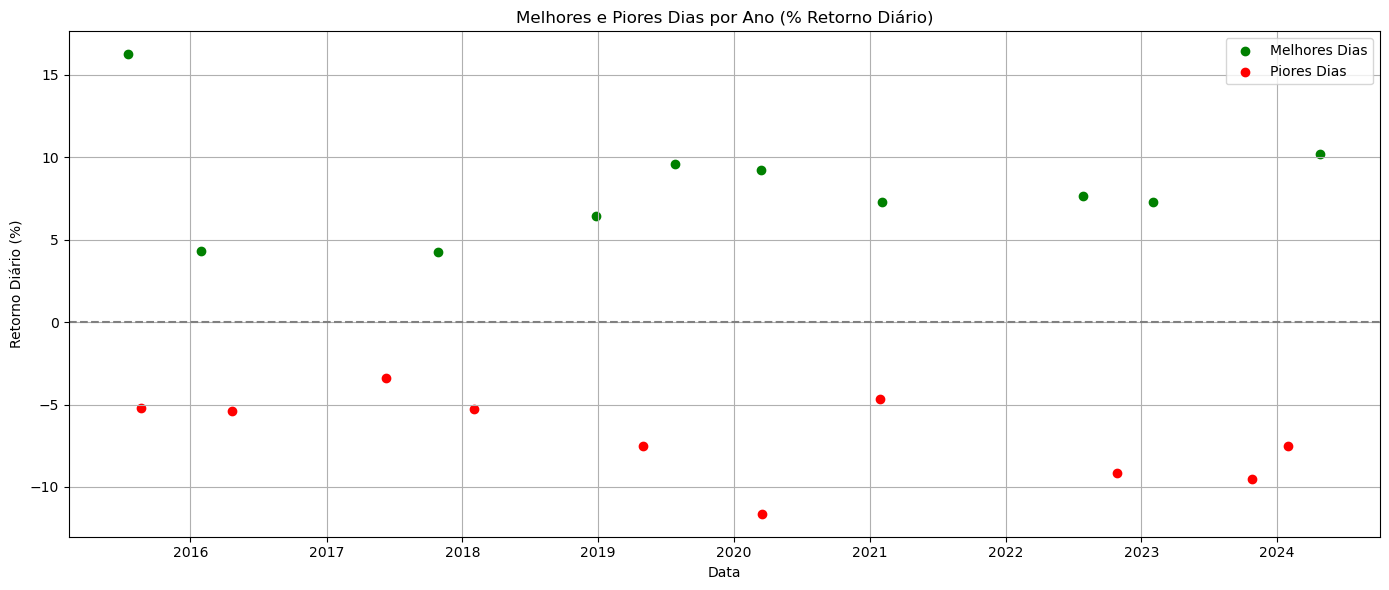

TypeError: 'NoneType' object is not callable

In [17]:
melhores_piores_dias()